**This notebook contain prediction on the Titanic dataset for the survival prediction of the passengers using pyCaret library.**

**Titanic Challenge Overview:** The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

**PyCaret** is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.
Source: [https://pycaret.org/](http://)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# Loading packages

# import pyCaret library
from pycaret.classification import *


In [ ]:
# Load train data
data = pd.read_csv('/kaggle/input/titanic-challenge-dataset/train.csv')

In [ ]:
# Setup the environment with all the explaination of the classification given. 
exp_clf = setup(data = data, target = 'Survived', session_id = 43)

In [ ]:
# Train and compare all the models 
model_cmp = compare_models()

In [ ]:
# create logistic regression model
lr = create_model('lr')

In [ ]:
# Prediction with Logictic regression by default model
prediction_lr = predict_model(lr)

In [ ]:
# Print logictic regression model parameters
print(lr)

In [ ]:
# Tune the hyperparameters for better Accuracy
tune_lr = tune_model(lr)

In [ ]:
# Print logistic regression model parameters
print(tune_lr)

In [ ]:
# Evaluate the model
evaluate_model(tune_lr)

In [ ]:
# Prediction on Test data
prediction_tune_lr = predict_model(tune_lr)

In [ ]:
# Disply predicted data with label and probability score added at the end
prediction_tune_lr.head()

In [ ]:
# Final version of the model trained on both the splited data, i.e train & test
final_lr = finalize_model(tune_lr)

In [ ]:
# Load test data
test_data = pd.read_csv('/kaggle/input/titanic-challenge-dataset/test.csv')

In [ ]:
# Prediction on Test Data
test_prediction = predict_model(final_lr, data = test_data)

In [ ]:
#Display
test_prediction.head()

In [ ]:
# Slice only PassengerId & Label column as replace the Label with Survived for submission in the same naming pattern
prediction_with_pycaret = test_prediction[['PassengerId', 'Label']].rename(columns = {'Label': 'Survived'})

In [ ]:
# Predicted output
prediction_with_pycaret

In [ ]:
# Save the file as csv
prediction_with_pycaret.to_csv('submission_with_pyCaret.csv', index = False)

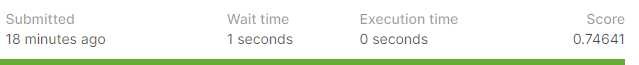